In [32]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df_train=pd.read_csv('sales_train.csv')

In [6]:
df_test=pd.read_csv('test.csv')

In [96]:
df_train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [7]:
df_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [55]:
df_train['item_id'].value_counts().head()

20949    31340
5822      9408
17717     9067
2808      7479
4181      6853
Name: item_id, dtype: int64

In [56]:
df_test['item_id'].value_counts().head()

2047     42
19744    42
15406    42
13359    42
3240     42
Name: item_id, dtype: int64

Removing outliers

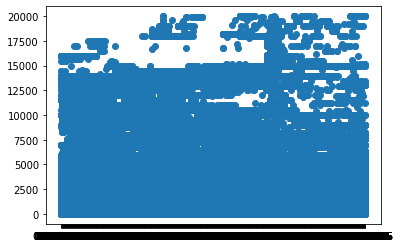

In [73]:
x=df_train['date']
y=df_train['item_price']
plt.scatter(x,y)
plt.show()

In [72]:
filt=(df_train['item_price']<25000)
df_train=df_train[filt]

In [74]:
ft=(df_train['item_cnt_day']<35)
df_train=df_train[ft]

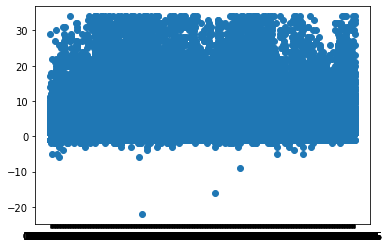

In [75]:
x=df_train['date']
y=df_train['item_cnt_day']
plt.scatter(x,y)
plt.show()

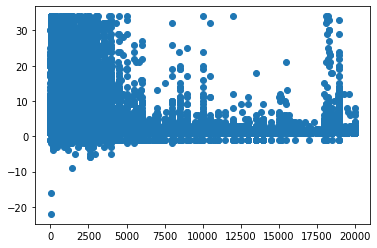

In [79]:
x=df_train['item_price']
y=df_train['item_cnt_day']
plt.scatter(x,y)
plt.show()

In [84]:
df_train.shape

(2927847, 6)

In [85]:
df_test.shape

(214200, 3)

In [103]:
df_test['date_block_num']=34

In [104]:
df_test.head()

,ID,shop_id,item_id,date_block_num
0,0,5,5037,34
1,1,5,5320,34
2,2,5,5233,34
3,3,5,5232,34
4,4,5,5268,34


In [90]:
df_test.drop(columns='date_block_name',inplace=True)

In [114]:
((df_train['date_block_num'].value_counts())/3142047)*100

11    4.546049
23    4.127246
2     3.861368
0     3.681899
1     3.456632
7     3.333750
6     3.199379
5     3.194192
12    3.155204
10    3.076275
8     3.055779
9     2.995531
3     2.994958
14    2.941681
4     2.919753
13    2.857914
24    2.802154
19    2.751646
22    2.728317
17    2.612023
21    2.509765
18    2.496875
16    2.489205
15    2.469027
20    2.315974
25    2.277942
26    2.218331
31    1.809998
27    1.784028
30    1.763882
29    1.731037
28    1.728714
33    1.695137
32    1.601122
Name: date_block_num, dtype: float64

In [112]:
2927847+214200

3142047

In [117]:
df_train['date_block_num']=df_train['date_block_num'].replace({0:3.681899,1:3.456632,2:3.861368,3:2.994958,4:2.919753,5:3.194192,6:3.199379,7:3.333750,8:3.055779,9:2.995531,10:3.076275,11:4.546049,12:3.155204,13:2.857914,14:2.941681,15:2.469027,16:2.489205,17:2.612023,
                                   18:2.496875,19:2.751646,20:2.315974,21:2.509765,22:2.728317,23:4.127246,24:2.802154,25:2.277942,26:2.218331,27:1.784028,28:1.728714,29:1.731037,30:1.763882,31:1.809998,32:1.601122,33:1.695137})

In [121]:
214200/3142047*100

6.817211836742098

In [122]:
df_test['date_block_num']=6.817211836742098

In [129]:
df_test=df_test[['date_block_num','shop_id','item_id']]

In [128]:
df_train['date']= pd.to_datetime(df_train['date'],format='%d.%m.%Y')
df_train.set_index('date',inplace=True)
df_train.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-01-02,3.681899,59,22154,999.00,1.0
2013-01-03,3.681899,25,2552,899.00,1.0
2013-01-05,3.681899,25,2552,899.00,-1.0
2013-01-06,3.681899,25,2554,1709.05,1.0
2013-01-15,3.681899,25,2555,1099.00,1.0


In [130]:
df_test.head()

,date_block_num,shop_id,item_id
0,6.817212,5,5037
1,6.817212,5,5320
2,6.817212,5,5233
3,6.817212,5,5232
4,6.817212,5,5268


Training

In [131]:
X = df_train[['date_block_num','shop_id','item_id']]

In [132]:
y =df_train['item_cnt_day']

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 7)

In [143]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(loss = 'lad',learning_rate=0.01,verbose=1)
regressor.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.2241            3.38m
         2           0.2239            3.43m
         3           0.2238            3.38m
         4           0.2236            3.34m
         5           0.2235            3.33m
         6           0.2233            3.29m
         7           0.2232            3.26m
         8           0.2230            3.23m
         9           0.2229            3.22m
        10           0.2227            3.21m
        20           0.2213            2.82m
        30           0.2200            2.44m
        40           0.2189            2.09m
        50           0.2182            1.74m
        60           0.2177            1.39m
        70           0.2172            1.04m
        80           0.2167           41.67s
        90           0.2164           20.86s
       100           0.2161            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='lad', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [144]:
df_test.head()

,date_block_num,shop_id,item_id
0,6.817212,5,5037
1,6.817212,5,5320
2,6.817212,5,5233
3,6.817212,5,5232
4,6.817212,5,5268


In [145]:
Xx=df_test[['date_block_num','shop_id','item_id']]

In [146]:
item_cnt_month= regressor.predict(Xx)

In [147]:
len(item_cnt_month)

214200

In [148]:
output= pd.DataFrame({'ID': test.ID,'item_cnt_month': item_cnt_month})

In [149]:
output.to_csv('submission8.csv', index=False)